<a href="https://colab.research.google.com/github/harihardiyan/topo_domain_wall/blob/main/Notebooks/TDWF_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# TDWF-JAX: Topological Domain-Wall Fermions Demo
This notebook demonstrates the capabilities of the **TDWF-JAX** framework, a hardware-accelerated tool for investigating 1D and 2D topological fermions at domain walls.

**Author:** Hari Hardiyan
**Framework:** JAX / XLA-optimized

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/harihardiyan/topo_domain_wall/blob/main/notebooks/TDWF_demo.ipynb)

In [1]:

import os
import sys

# 1. Clone the repository
!git clone https://github.com/harihardiyan/topo_domain_wall.git

# 2. Add the directory to sys.path so we can import topo_dw
sys.path.append('/content/topo_domain_wall')

# 3. Configure JAX for 64-bit precision
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Import our framework
import topo_dw as tdw

print("JAX Version:", jax.__version__)
print("TDWF-JAX Framework loaded successfully.")

Cloning into 'topo_domain_wall'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 268 (delta 61), reused 0 (delta 0), pack-reused 169 (from 1)
Receiving objects: 100% (268/268), 91.41 KiB | 4.57 MiB/s, done.
Resolving deltas: 100% (129/129), done.
JAX Version: 0.7.2
TDWF-JAX Framework loaded successfully.


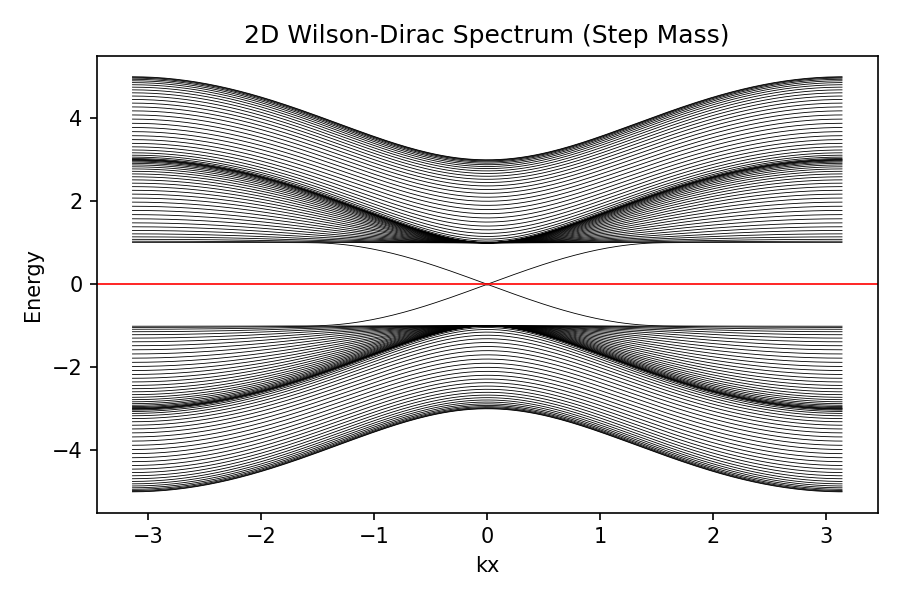

In [2]:

# Parameters
Ny = 60
Nkx = 200

# 1. Create a step mass profile (Domain Wall)
m_step = tdw.mass_step_profile_y(Ny, m_top=-1.0, m_bottom=1.0)

# 2. Calculate the spectrum
kx, E = tdw.spectrum_2d_wilson(m_step, Ny, Nkx=Nkx)

# 3. Plot the result
tdw.plot_spectrum(kx, E, "2D Wilson-Dirac Spectrum (Step Mass)", "spectrum_step.png")

# Display in notebook
from IPython.display import Image
Image("spectrum_step.png")

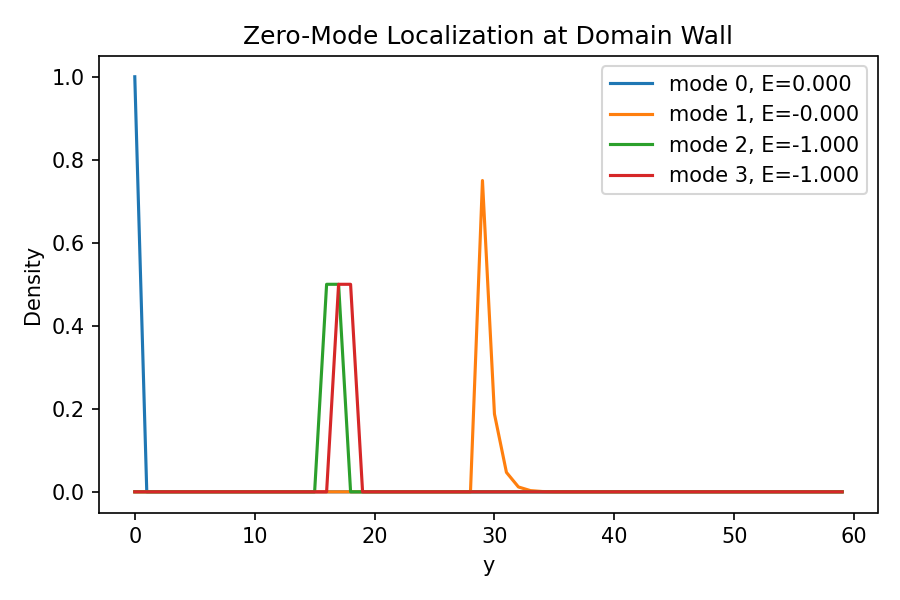

In [3]:

# 1. Extract interface modes at kx = 0
ys, Es, Dens = tdw.interface_modes_2d(m_step, Ny, kx_target=0.0, n_modes=4)

# 2. Plot localization
tdw.plot_interface_modes(ys, Dens, Es, "Zero-Mode Localization at Domain Wall", "interface.png")

# Display
Image("interface.png")

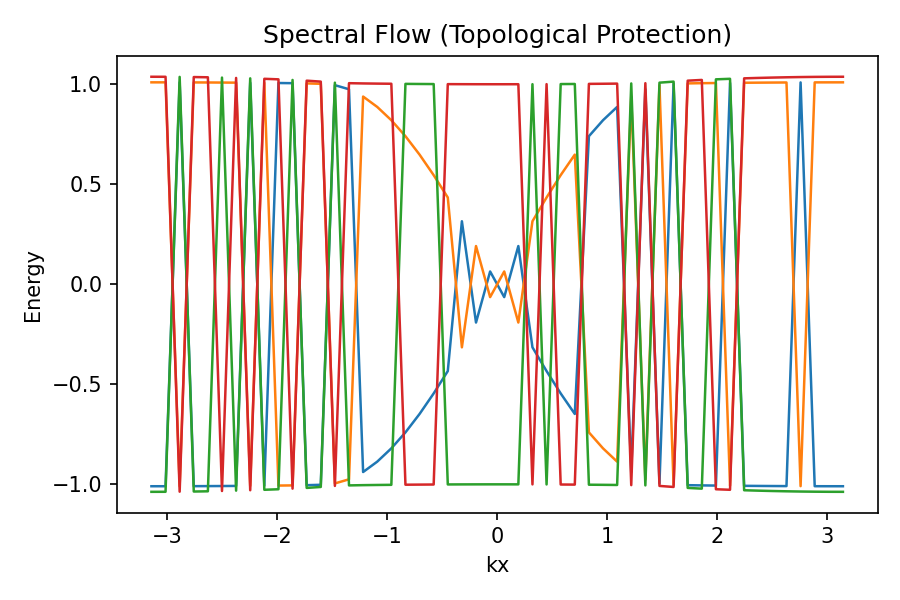

In [4]:

# Spectral flow shows how eigenvalues cross the gap
kx_f, E_f = tdw.spectral_flow_2d_wilson(m_step, Ny, Nkx=50)

tdw.plot_spectral_flow(kx_f, E_f, "Spectral Flow (Topological Protection)", "flow.png")

# Display
Image("flow.png")